In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np

df=pd.read_csv(r"C:\Users\kdbts\OneDrive\文档\DS Projects\WA_Fn-UseC_-Telco-Customer-Churn.csv")
#display first few rows
print(df.head())

#display basic info about dataset
print("--Basic info about dataset--")
print(df.info())

#check for null values
print("--Check for null values--")
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [35]:
#Converting the Yes/No columns to Boolean
binary_columns=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_columns:
    df[col]=df[col].apply(lambda x:1 if x=='Yes' else 0)
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to

In [36]:
#Encoding categorical variables
df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines OnlineSecurity OnlineBackup  ...  \
0             0  No phone service             No          Yes  ...   
1             1                No            Yes           No  ...   
2             1                No            Yes          Yes  ...   
3             0  No phone service            Yes           No  ...   
4             1                No             No           No  ...   

  MonthlyCharges TotalCharges Churn InternetService_Fiber optic  \
0          29.85        29.85     0                       False   
1          56.95       1889.5 

In [37]:
#Converting numerical data types
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df.isnull().sum())

customerID                                0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [38]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines OnlineSecurity OnlineBackup  ...  \
0             0  No phone service             No          Yes  ...   
1             1                No            Yes           No  ...   
2             1                No            Yes          Yes  ...   
3             0  No phone service            Yes           No  ...   
4             1                No             No           No  ...   

  MonthlyCharges TotalCharges Churn InternetService_Fiber optic  \
0          29.85        29.85     0                       False   
1          56.95      1889.50 

C:\Users\kdbts\AppData\Local\Temp\ipykernel_20108\3238902989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)


In [39]:
# Replacing NaN with mean value
df.loc[df['TotalCharges'].isnull(),'TotalCharges']=df['TotalCharges'].mean()
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines OnlineSecurity OnlineBackup  ...  \
0             0  No phone service             No          Yes  ...   
1             1                No            Yes           No  ...   
2             1                No            Yes          Yes  ...   
3             0  No phone service            Yes           No  ...   
4             1                No             No           No  ...   

  MonthlyCharges TotalCharges Churn InternetService_Fiber optic  \
0          29.85        29.85     0                       False   
1          56.95      1889.50 

In [40]:
#Dropping irrelevant columns
df.drop(['customerID'],axis=1,inplace=True)

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   OnlineSecurity                         7043 non-null   object 
 8   OnlineBackup                           7043 non-null   object 
 9   DeviceProtection                       7043 non-null   object 
 10  TechSupport                            7043 non-null   object 
 11  Stre

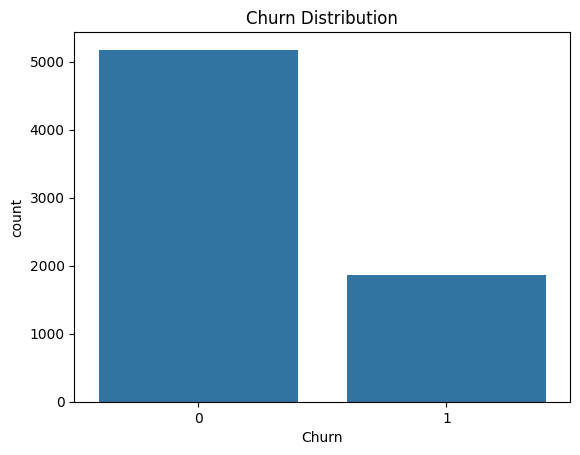

In [42]:
#--EDA--
import seaborn as sns
#Count plot for target variable
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

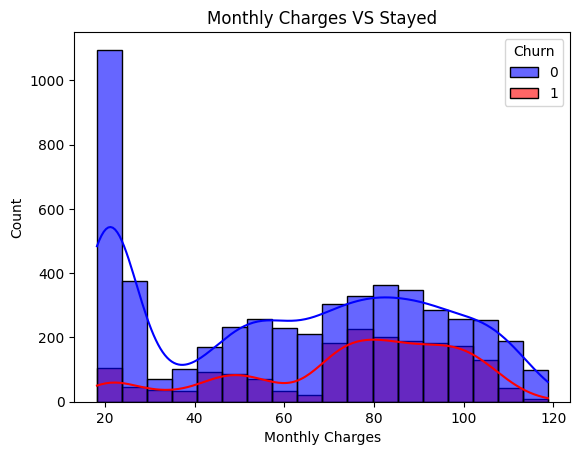

In [43]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, alpha=0.6, palette={1: 'red', 0: 'blue'})
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Monthly Charges VS Stayed')
plt.show()

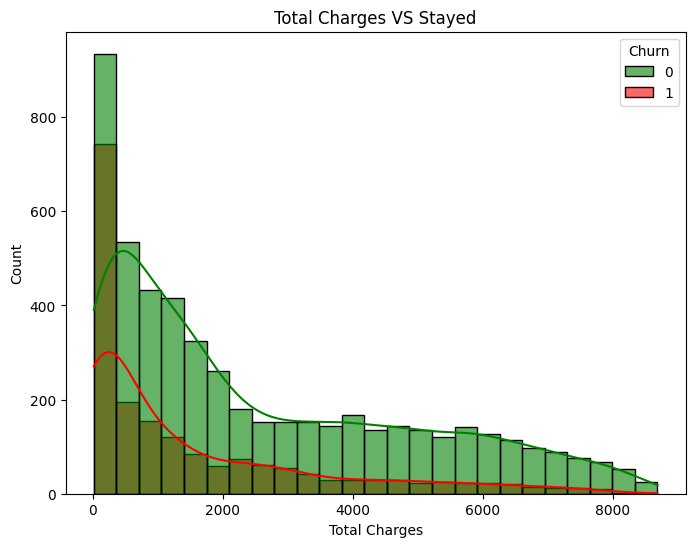

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='TotalCharges',hue='Churn',kde=True,alpha=0.6,palette={1:'red',0:'green'})
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title("Total Charges VS Stayed")
plt.show()

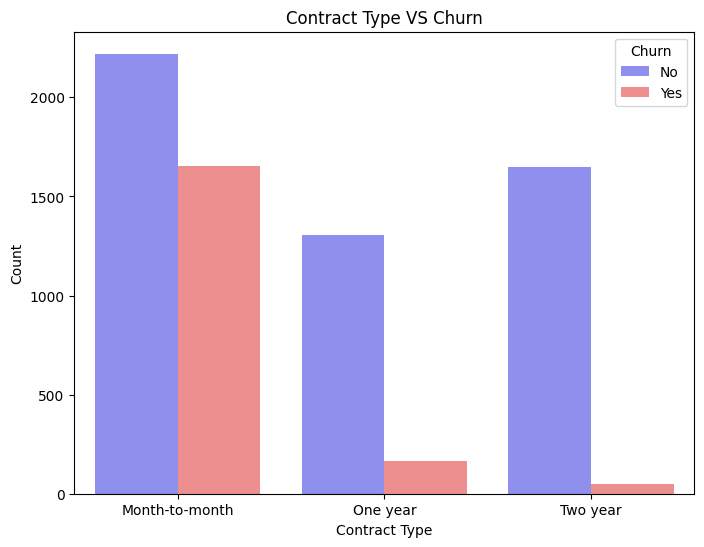

In [45]:
original_data=pd.read_csv(r"C:\Users\kdbts\OneDrive\文档\DS Projects\WA_Fn-UseC_-Telco-Customer-Churn.csv")
plt.figure(figsize=(8,6))
sns.countplot(data=original_data,x='Contract',hue='Churn',alpha=0.5,palette={'Yes':'red','No':'blue'})
plt.title("Contract Type VS Churn")
plt.xlabel("Contract Type")
plt.ylabel('Count')
plt.show()

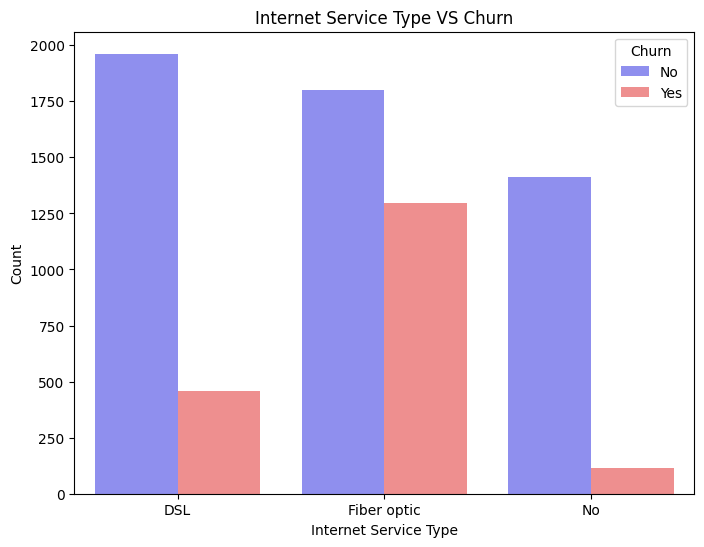

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(data=original_data,x='InternetService',hue='Churn',alpha=0.5,palette={'Yes':'red','No':'blue'})
plt.title('Internet Service Type VS Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

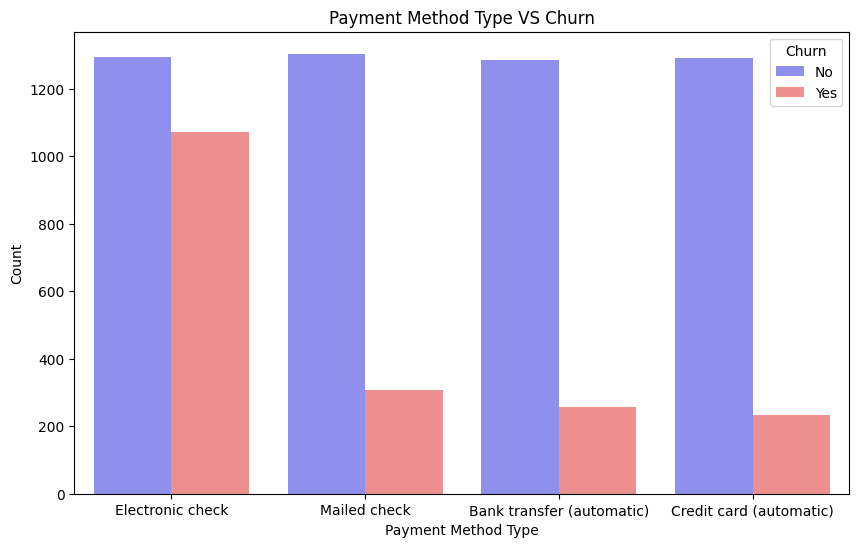

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=original_data,x='PaymentMethod',hue='Churn',alpha=0.5,palette={'Yes':'red','No':'blue'})
plt.title('Payment Method Type VS Churn')
plt.xlabel('Payment Method Type')
plt.ylabel('Count')
plt.show()

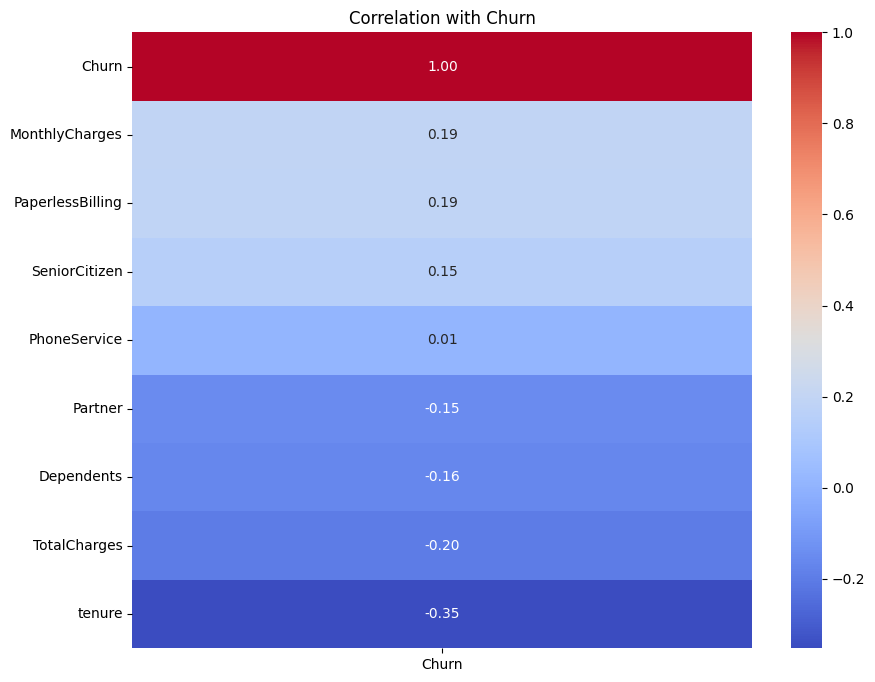

In [48]:
plt.figure(figsize=(10,8))
numerical_data=df.select_dtypes(include=['float64','int64'])
corr=numerical_data.corr()
churn_correlation=corr[['Churn']].sort_values(by='Churn',ascending=False)
sns.heatmap(churn_correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation with Churn")
plt.show()

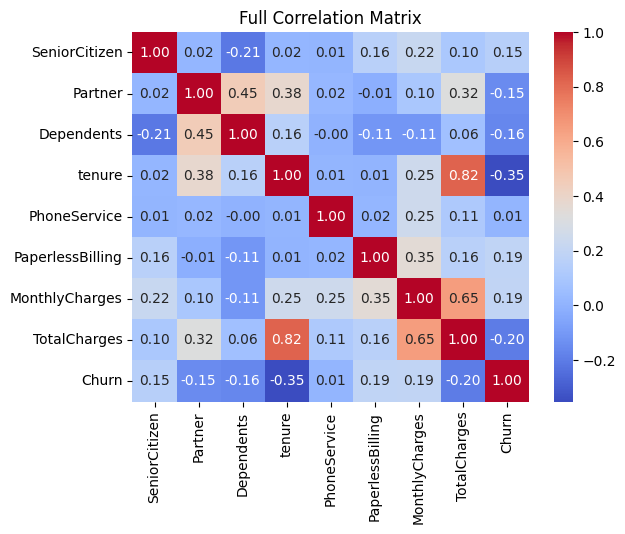

In [49]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Full Correlation Matrix")
plt.show()

C:\Users\kdbts\AppData\Local\Temp\ipykernel_20108\1292601380.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  original_data['Churn']=original_data['Churn'].replace({'Yes':1,'No':0})


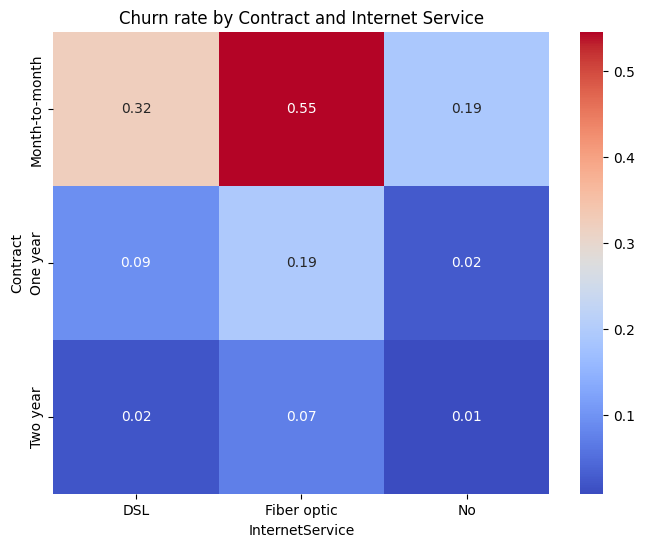

In [50]:
#Combined analysis(Contract & InternetServices)
original_data['Churn']=original_data['Churn'].replace({'Yes':1,'No':0})
contract_internet_pivot=original_data.pivot_table(values='Churn',index='Contract',columns='InternetService',aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(contract_internet_pivot,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Churn rate by Contract and Internet Service')
plt.show()

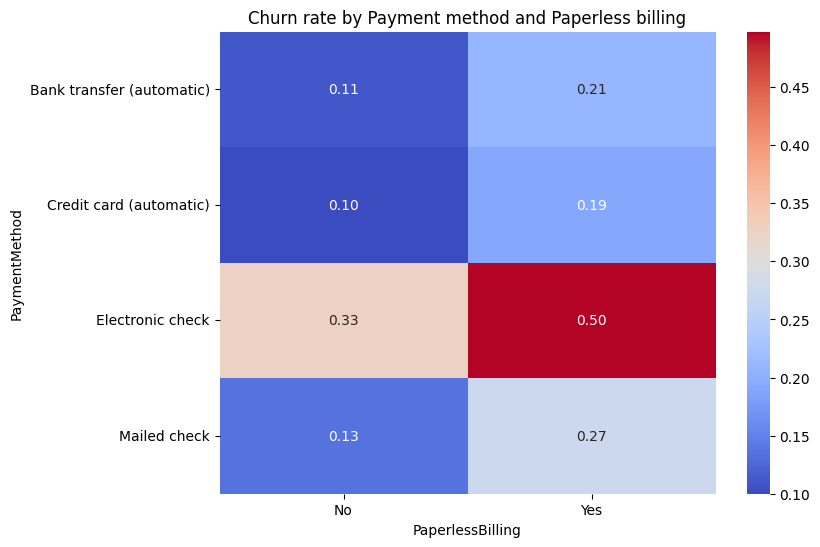

In [51]:
payment_billing_pivot=original_data.pivot_table(values='Churn',index='PaymentMethod',columns='PaperlessBilling',aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(payment_billing_pivot,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Churn rate by Payment method and Paperless billing')
plt.show()

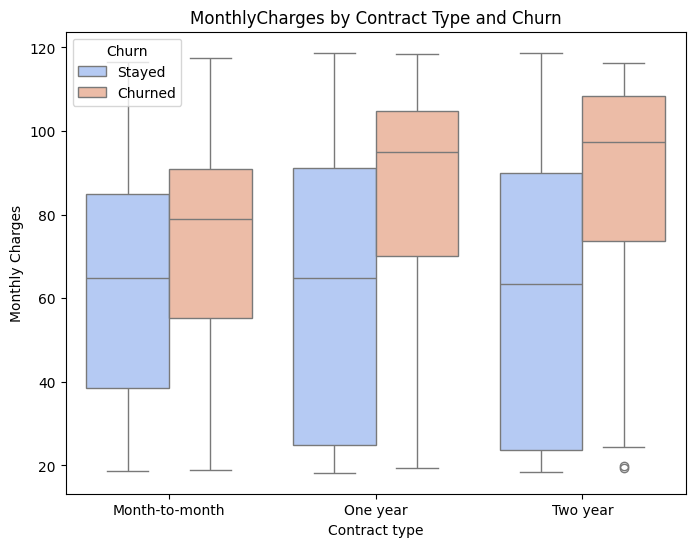

In [52]:
#Analyze MonthlyCharges by Contract
plt.figure(figsize=(8,6))
ax=sns.boxplot(data=original_data,x='Contract',y='MonthlyCharges',hue='Churn',palette='coolwarm')
handles,labels=ax.get_legend_handles_labels()
plt.title('MonthlyCharges by Contract Type and Churn')
plt.xlabel('Contract type')
plt.ylabel('Monthly Charges')
plt.legend(handles=handles,title='Churn',labels=['Stayed','Churned'])
plt.show()

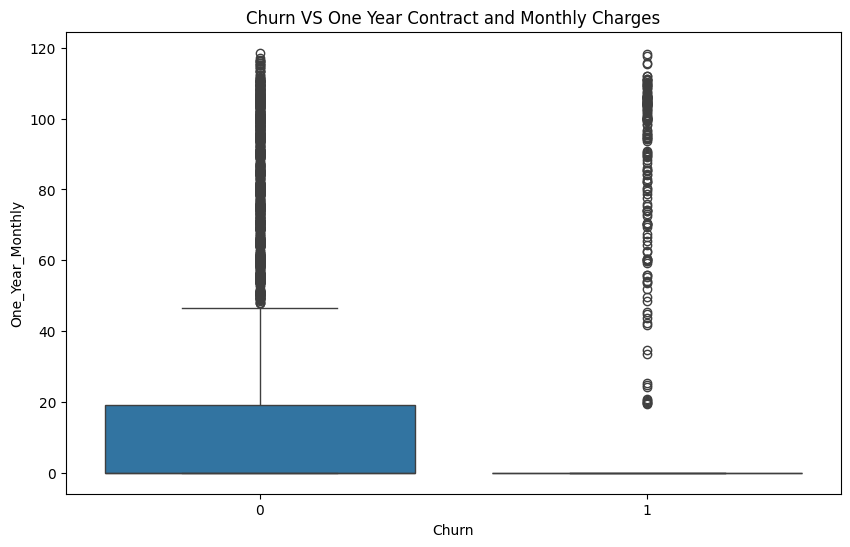

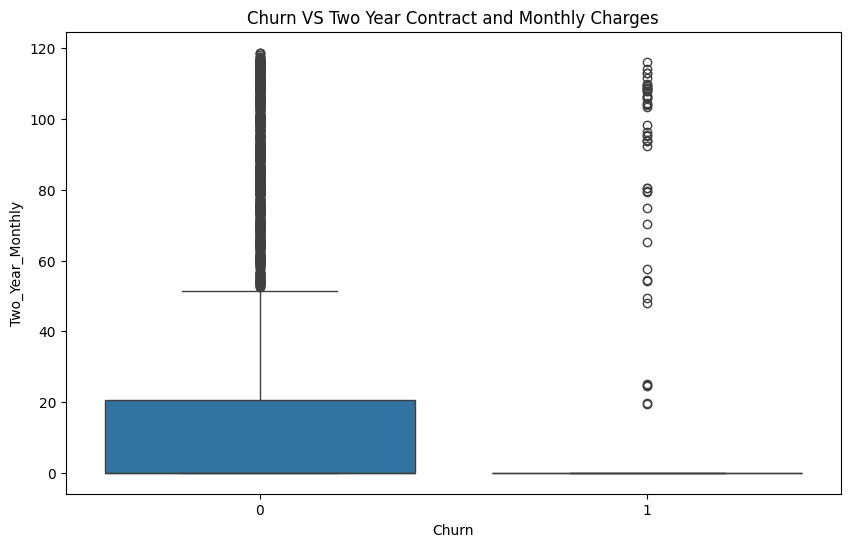

In [53]:
#Combining Features
df['One_Year_Monthly']=df['Contract_One year']*df['MonthlyCharges']
df['Two_Year_Monthly']=df['Contract_Two year']*df['MonthlyCharges']
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn',y='One_Year_Monthly',data=df)
plt.title('Churn VS One Year Contract and Monthly Charges')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn',y='Two_Year_Monthly',data=df)
plt.title('Churn VS Two Year Contract and Monthly Charges')
plt.show()

In [54]:
#Creating ratios
df['AverageMonthlyCost']=df['TotalCharges']/df['tenure']
df['AverageMonthlyCost']=df['AverageMonthlyCost'].fillna(df['MonthlyCharges'])

C:\Users\kdbts\AppData\Local\Temp\ipykernel_20108\2580581189.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Churn',y='AverageMonthlyCost',palette='muted')


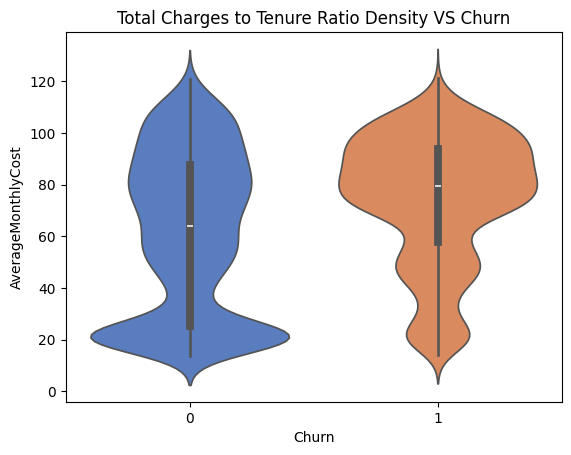

In [55]:
sns.violinplot(data=df,x='Churn',y='AverageMonthlyCost',palette='muted')
plt.title("Total Charges to Tenure Ratio Density VS Churn")
plt.show()

In [56]:
services=['OnlineSecurity','DeviceProtection','StreamingMovies','StreamingTV']
df['TotalServices']=df[services].sum(axis=1)

In [57]:
#Temporal Feature
df['TenureGroup']=pd.cut(df['tenure'],bins=[0,12,24,36,48,60,np.inf],labels=['0-1 Year','1-2 Years','2-3 Years','3-4 Years','4-5 Years','5+ Years'])

In [58]:
#Interaction Features
df['Fiber_OneYear']=df['InternetService_Fiber optic']*df['Contract_One year']
df['Fiber_TwoYear']=df['InternetService_Fiber optic']*df['Contract_Two year']

df['DSL_OneYear']=df['InternetService_No']*df['Contract_One year']
df['DSL_TwoYear']=df['InternetService_No']*df['Contract_Two year']

In [59]:
#Analyzing Aggregated Binary Features
for col in services:  
    churn_rate = df.groupby(col)["Churn"].mean()
    print(f"Churn rate by {col}:\n{churn_rate}\n")

Churn rate by OnlineSecurity:
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

Churn rate by DeviceProtection:
DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64

Churn rate by StreamingMovies:
StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn, dtype: float64

Churn rate by StreamingTV:
StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64



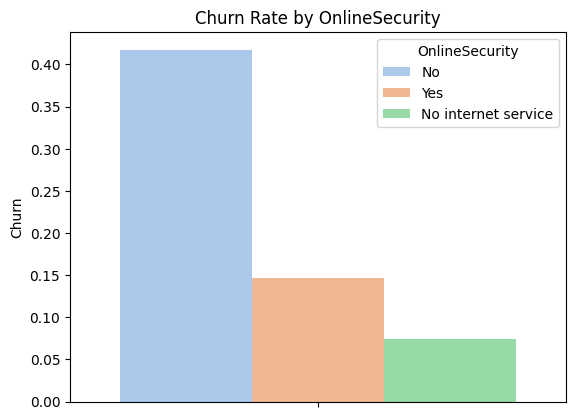

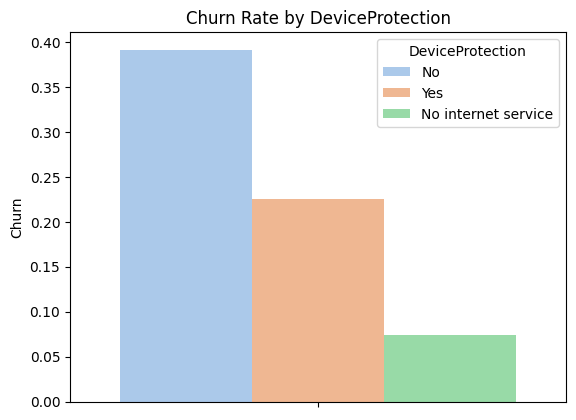

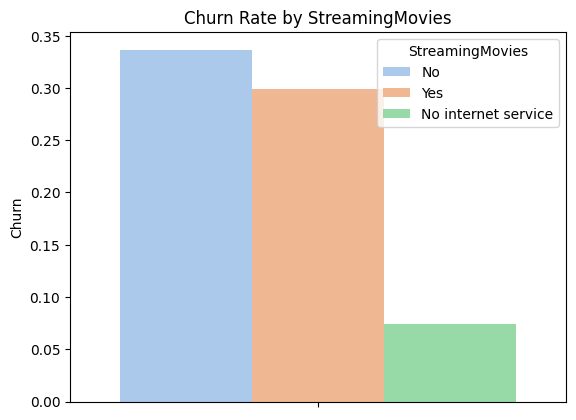

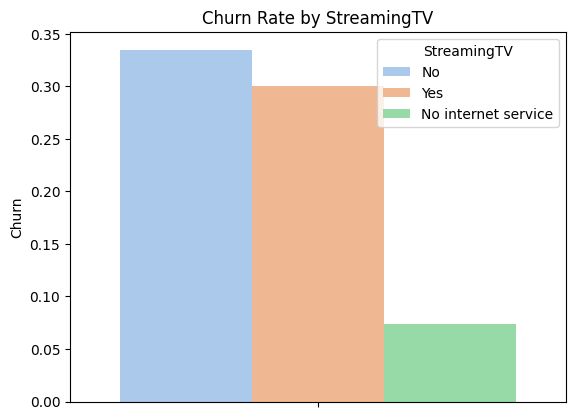

In [60]:
for col in services:
    sns.barplot(data=df, hue=col, y="Churn", errorbar=None, palette="pastel")
    plt.title(f"Churn Rate by {col}")
    plt.show()


In [61]:
#Analyzing Temporal Features (Tenure Groups)
churn_rate = df.groupby("TenureGroup")["Churn"].mean()
print(f"Churn rate by Tenure Group:\n{churn_rate}\n")


Churn rate by Tenure Group:
TenureGroup
0-1 Year     0.476782
1-2 Years    0.287109
2-3 Years    0.216346
3-4 Years    0.190289
4-5 Years    0.144231
5+ Years     0.066098
Name: Churn, dtype: float64



C:\Users\kdbts\AppData\Local\Temp\ipykernel_20108\3582785870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby("TenureGroup")["Churn"].mean()


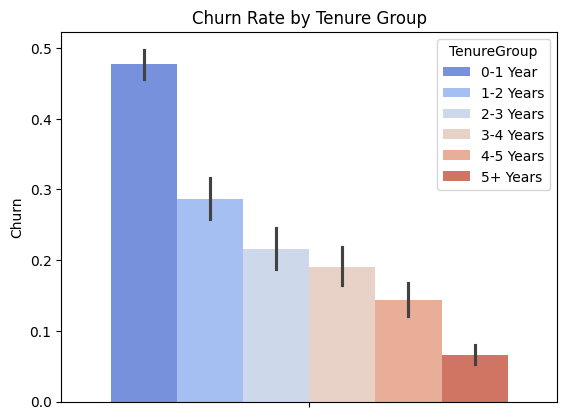

In [62]:
sns.barplot(data=df, hue="TenureGroup", y="Churn", palette="coolwarm")
plt.title("Churn Rate by Tenure Group")
plt.show()


C:\Users\kdbts\AppData\Local\Temp\ipykernel_20108\1968747785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="Fiber_OneYear", palette="Set3")


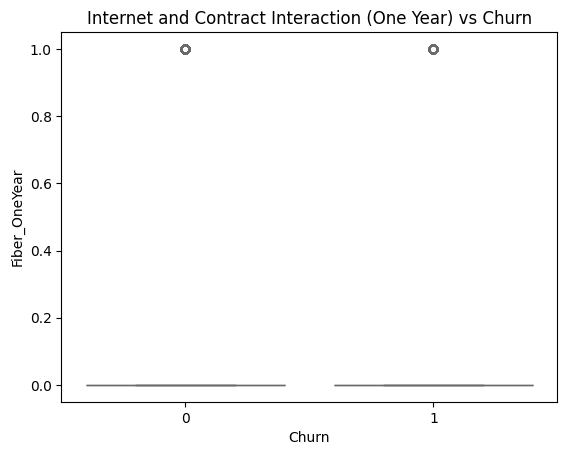

In [63]:
# Analyzing Interaction Features
sns.boxplot(data=df, x="Churn", y="Fiber_OneYear", palette="Set3")
plt.title("Internet and Contract Interaction (One Year) vs Churn")
plt.show()

C:\Users\kdbts\AppData\Local\Temp\ipykernel_20108\2113905056.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="Fiber_TwoYear", palette="Set3")


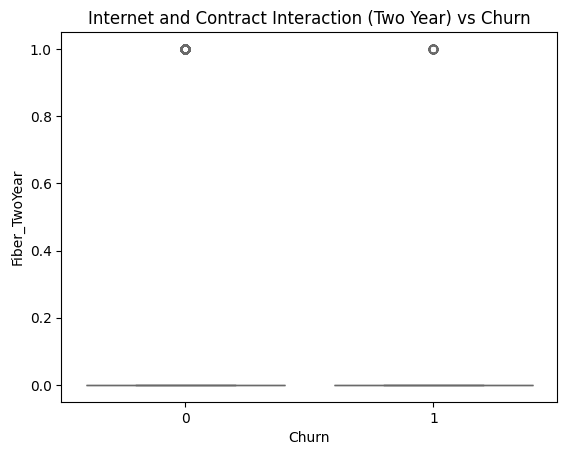

In [64]:
sns.boxplot(data=df, x="Churn", y="Fiber_TwoYear", palette="Set3")
plt.title("Internet and Contract Interaction (Two Year) vs Churn")
plt.show()

In [65]:
churn_rate = df.groupby("Fiber_OneYear")["Churn"].mean()
print(f"Churn rate by Internet-Contract Interaction:\n{churn_rate}\n")


Churn rate by Internet-Contract Interaction:
Fiber_OneYear
False    0.271371
True     0.192950
Name: Churn, dtype: float64



In [66]:
###Feature selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('Churn',axis=1)  #dropping the target variable
y=df["Churn"]

#Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_trained_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

ValueError: could not convert string to float: 'Male'

In [67]:
# Ensure all categorical columns are encoded
categorical_columns = X.select_dtypes(include=['object']).columns  # Identify non-numeric columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # Apply one-hot encoding

# Splitting the data again with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale testing data


ValueError: Cannot cast object dtype to float64

In [68]:
print(X.dtypes[X.dtypes=='object'])

gender              object
MultipleLines       object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
TotalServices       object
dtype: object


In [69]:
categorical_columns = X.select_dtypes(include=['object']).columns  # Identify non-numeric columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True) 

In [70]:
print(X_encoded.dtypes)

SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
PaperlessBilling                            int64
MonthlyCharges                            float64
TotalCharges                              float64
InternetService_Fiber optic                  bool
InternetService_No                           bool
Contract_One year                            bool
Contract_Two year                            bool
PaymentMethod_Credit card (automatic)        bool
PaymentMethod_Electronic check               bool
PaymentMethod_Mailed check                   bool
One_Year_Monthly                          float64
Two_Year_Monthly                          float64
AverageMonthlyCost                        float64
TenureGroup                              category
Fiber_OneYear                                bool


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [72]:
print(X['TenureGroup'].unique())

['0-1 Year', '2-3 Years', '3-4 Years', '1-2 Years', '5+ Years', '4-5 Years', NaN]
Categories (6, object): ['0-1 Year' < '1-2 Years' < '2-3 Years' < '3-4 Years' < '4-5 Years' < '5+ Years']


In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['TenureGroup']=le.fit_transform(X['TenureGroup'])

In [74]:
print(X['TenureGroup'].dtype)

int64


In [75]:
print(X_encoded.dtypes)

SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
PaperlessBilling                            int64
MonthlyCharges                            float64
TotalCharges                              float64
InternetService_Fiber optic                  bool
InternetService_No                           bool
Contract_One year                            bool
Contract_Two year                            bool
PaymentMethod_Credit card (automatic)        bool
PaymentMethod_Electronic check               bool
PaymentMethod_Mailed check                   bool
One_Year_Monthly                          float64
Two_Year_Monthly                          float64
AverageMonthlyCost                        float64
TenureGroup                              category
Fiber_OneYear                                bool


In [76]:
categorical_columns = X.select_dtypes(include=['object']).columns  # Identify non-numeric columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # Apply one-hot encoding

# Splitting the data again with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale testing data


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [77]:
# Convert categorical columns with 'category' dtype to int
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Now apply the scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale testing data


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [78]:
# Inspect the unique values in the 'TenureGroup' column
print(X['TenureGroup'].unique())

# Map categorical values to numeric values if needed
X['TenureGroup'] = X['TenureGroup'].map({
    '0-1 Year': 0,
    '1-2 Years': 1,
    '2-3 Years': 2,
    '3-4 Years': 3,
    '4-5 Years': 4,
    '5-6 Years': 5,
    '6-7 Years': 6,
    '7-8 Years': 7,
    '8-9 Years': 8,
    '9-10 Years': 9
})

# Check the data type after mapping
print(X['TenureGroup'].dtype)


[0 2 3 1 5 4 6]
float64


In [79]:
# Check the data types again
print(X_encoded.dtypes)


SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
One_Year_Monthly                         float64
Two_Year_Monthly                         float64
AverageMonthlyCost                       float64
TenureGroup                                int64
Fiber_OneYear                               bool
Fiber_TwoYear       

In [80]:
# Splitting the data again with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale testing data


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [81]:
# Check for infinite values
print((X_encoded == float('inf')).sum())  # Check if any column has positive infinity
print((X_encoded == float('-inf')).sum()) # Check if any column has negative infinity

# Check for NaN values
print(X_encoded.isna().sum())  # Check for missing values


SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                              0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
One_Year_Monthly                          0
Two_Year_Monthly                          0
AverageMonthlyCost                       11
TenureGroup                               0
Fiber_OneYear                             0
Fiber_TwoYear                             0
DSL_OneYear                               0
DSL_TwoYear                     

In [82]:
# Replace infinite values with NaN
X_encoded.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Replace NaN values with the column median (or mean, depending on your use case)
X_encoded.fillna(X_encoded.median(), inplace=True)


In [83]:
# Splitting the data again with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale testing data


In [84]:
# Check again for any remaining NaN or infinite values
print(X_encoded.isna().sum())  # Should return 0 for all columns
print((X_encoded == float('inf')).sum())  # Should return 0 for all columns
print((X_encoded == float('-inf')).sum())  # Should return 0 for all columns


SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
One_Year_Monthly                         0
Two_Year_Monthly                         0
AverageMonthlyCost                       0
TenureGroup                              0
Fiber_OneYear                            0
Fiber_TwoYear                            0
DSL_OneYear                              0
DSL_TwoYear                              0
gender_Male

In [85]:
# Replace infinities with NaN, then replace NaNs with the column mean or median
X_encoded.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
X_encoded.fillna(X_encoded.median(), inplace=True)


In [86]:
# Check again for any remaining NaN or infinite values
print(X_encoded.isna().sum())  # Should return 0 for all columns
print((X_encoded == float('inf')).sum())  # Should return 0 for all columns
print((X_encoded == float('-inf')).sum())  # Should return 0 for all columns


SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
One_Year_Monthly                         0
Two_Year_Monthly                         0
AverageMonthlyCost                       0
TenureGroup                              0
Fiber_OneYear                            0
Fiber_TwoYear                            0
DSL_OneYear                              0
DSL_TwoYear                              0
gender_Male

In [87]:
# Check for outliers or extremely large values
print(X_encoded.describe())


       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges  One_Year_Monthly  \
count       7043.000000     7043.000000   7043.000000       7043.000000   
mean           0.592219       64.761692   2283.300441         13.604515   
std            0.491457       30.090047   2265.000258         30.197544   
min   

In [88]:
# Example: Create TenureGroup based on the 'tenure' column
def assign_tenure_group(tenure):
    if tenure < 12:
        return 'Short-term'
    elif 12 <= tenure < 36:
        return 'Mid-term'
    else:
        return 'Long-term'

X_train['TenureGroup'] = X_train['tenure'].apply(assign_tenure_group)
X_test['TenureGroup'] = X_test['tenure'].apply(assign_tenure_group)


In [89]:
print(X_encoded.describe())

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges  One_Year_Monthly  \
count       7043.000000     7043.000000   7043.000000       7043.000000   
mean           0.592219       64.761692   2283.300441         13.604515   
std            0.491457       30.090047   2265.000258         30.197544   
min   

In [90]:
# Check for NaN values in 'TenureGroup'
print(X_train['TenureGroup'].isnull().sum())
print(X_test['TenureGroup'].isnull().sum())


0
0


In [ ]:
# Fill any remaining NaN values with 'Unknown' (or other default category)
X_train['TenureGroup'].fillna('Unknown', inplace=True)
X_test['TenureGroup'].fillna('Unknown', inplace=True)


In [ ]:
# Correct way to fill NaN values without inplace
X_train['TenureGroup'] = X_train['TenureGroup'].fillna('Unknown')
X_test['TenureGroup'] = X_test['TenureGroup'].fillna('Unknown')


In [ ]:
# Double-check for NaN values
print(X_train['TenureGroup'].isnull().sum())
print(X_test['TenureGroup'].isnull().sum())

# Check unique values in 'TenureGroup' to confirm
print(X_train['TenureGroup'].unique())
print(X_test['TenureGroup'].unique())


In [ ]:
# One-Hot Encoding (if needed)
X_train = pd.get_dummies(X_train, columns=['TenureGroup'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['TenureGroup'], drop_first=True)


In [ ]:
# Splitting the data again with the encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)        # Scale testing data


In [ ]:
print(X_train.isnull().sum())
print(X_train.isin([np.inf, -np.inf]).sum())

print(X_test.isnull().sum())
print(X_test.isin([np.inf, -np.inf]).sum())

In [ ]:
# Fill NaN values with the median (or mean)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


In [ ]:
print(X_train.isnull().sum())
print(X_train.isin([np.inf, -np.inf]).sum())

print(X_test.isnull().sum())
print(X_test.isin([np.inf, -np.inf]).sum())

In [ ]:
# Replace infinite values with large number (or any suitable value)
X_train.replace([np.inf, -np.inf], 1e10, inplace=True)
X_test.replace([np.inf, -np.inf], 1e10, inplace=True)


In [ ]:
print(X_train.isnull().sum())
print(X_train.isin([np.inf, -np.inf]).sum())

print(X_test.isnull().sum())
print(X_test.isin([np.inf, -np.inf]).sum())

In [ ]:
# Check the NaN values in the TenureGroup column
print(X_train['TenureGroup'].isnull().sum())
print(X_test['TenureGroup'].isnull().sum())


In [ ]:
# Replace NaN values in TenureGroup with the most frequent value
most_frequent = X_train['TenureGroup'].mode()[0]
X_train['TenureGroup'].fillna(most_frequent, inplace=True)
X_test['TenureGroup'].fillna(most_frequent, inplace=True)


In [ ]:
# If TenureGroup is categorical, encode it
X_train['TenureGroup'] = X_train['TenureGroup'].astype('category')
X_test['TenureGroup'] = X_test['TenureGroup'].astype('category')


In [ ]:
def assign_tenure_group(tenure):
    if tenure < 2:
        return 'Short-term'
    elif 2 <= tenure < 7:
        return 'Mid-term'
    else:
        return 'Long-term'

X_train['TenureGroup'] = X_train['tenure'].apply(assign_tenure_group)
X_test['TenureGroup'] = X_test['tenure'].apply(assign_tenure_group)


In [ ]:
print(X_encoded.describe())

In [ ]:
print(X_train['TenureGroup'].isnull().sum())
print(X_test['TenureGroup'].isnull().sum())

In [ ]:
# Check if there are any NaN values in 'TenureGroup' column
nan_in_tenuregroup = X_train['TenureGroup'].isna().sum()

# Print the result
print(f"Number of NaN values in 'TenureGroup': {nan_in_tenuregroup}")


In [ ]:
# Check for missing values (NaN) in 'TenureGroup'
missing_values = X_train['TenureGroup'].isna().sum()
print(f"Number of missing values in 'TenureGroup': {missing_values}")


In [ ]:
print(X_encoded.isna().sum())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  

In [ ]:
import numpy as np

# Check for infinite values in the data
infinite_values = np.isinf(X_train).sum().sum()
print(f"Number of infinite values in X_train: {infinite_values}")


In [ ]:
# Check for infinite values in the data
infinite_values = np.isinf(X_train).sum().sum()
print(f"Number of infinite values in X_train: {infinite_values}")

In [ ]:
# Replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [ ]:
# Check for any remaining NaN values
nan_values_train = X_train.isna().sum().sum()
nan_values_test = X_test.isna().sum().sum()

print(f"Number of NaN values in X_train: {nan_values_train}")
print(f"Number of NaN values in X_test: {nan_values_test}")


In [ ]:
# Initialize and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test) 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
model=LogisticRegression(random_state=42)

In [ ]:
model.fit(X_train_scaled,y_train)

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
#improving the model by handling class imbalance

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))


In [ ]:
# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Evaluating using other models-----


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")  # Balanced weighting for classes
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
